<a href="https://colab.research.google.com/github/Yasir323/100-days-of-code/blob/master/TIme_Series_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O test.csv https://datahack-prod.s3.amazonaws.com/test_file/Test_0qrQsBZ.csv

--2021-07-05 14:01:45--  https://datahack-prod.s3.amazonaws.com/test_file/Test_0qrQsBZ.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.16
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122701 (120K) [text/csv]
Saving to: ‘test.csv’

test.csv            100%[===================>] 119.83K   192KB/s    in 0.6s    

2021-07-05 14:01:47 (192 KB/s) - ‘test.csv’ saved [122701/122701]



In [2]:
!wget -O train.csv https://datahack-prod.s3.amazonaws.com/train_file/Train_SU63ISt.csv

--2021-07-05 14:01:47--  https://datahack-prod.s3.amazonaws.com/train_file/Train_SU63ISt.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.72
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 489054 (478K) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>] 477.59K   461KB/s    in 1.0s    

2021-07-05 14:01:49 (461 KB/s) - ‘train.csv’ saved [489054/489054]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_original = pd.read_csv('train.csv', error_bad_lines=False)
train = train_original.copy()
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
test_original = pd.read_csv('test.csv', error_bad_lines=False)
test = test_original.copy()
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


# Components of a Time Series
<img src="https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2018/09/20133757/time-series.png">

1. **Trend**: Trend is a general direction in which something is developing or changing. So we see an increasing trend in the time series below.

<img src="https://www.oraylis.de/sites/default/files/styles/optimize/public/inline-images/2015_10_Rplot04_thumb.png?itok=rvwgk3N9">

2. **Seasonal Variations**: These are the rhythmic forces which operate in a regular and periodic manner over a span of less than a year. They have the same or almost the same pattern during a period of 12 months. This variation will be present in a time series if the data are recorded hourly, daily, weekly, quarterly, or monthly.

These variations come into play either because of the natural forces or man-made conventions. The various seasons or climatic conditions play an important role in seasonal variations. Such as production of crops depends on seasons, the sale of umbrella and raincoats in the rainy season, and the sale of electric fans and A.C. shoots up in summer seasons.

The effect of man-made conventions such as some festivals, customs, habits, fashions, and some occasions like marriage is easily noticeable.  They recur themselves year after year. An upswing in a season should not be taken as an indicator of better business conditions.

3. **Cyclic Variations**: The variations in a time series which operate themselves over a span of more than one year are the cyclic variations. This oscillatory movement has a period of oscillation of more than a year. One complete period is a cycle. This cyclic movement is sometimes called the ‘Business Cycle’.

It is a four-phase cycle comprising of the phases of prosperity, recession, depression, and recovery. The cyclic variation may be regular are not periodic. The upswings and the downswings in business depend upon the joint nature of the economic forces and the interaction between them.

4. **Random or Irregular Movements**: There is another factor which causes the variation in the variable under study. They are not regular variations and are purely random or irregular. These fluctuations are unforeseen, uncontrollable, unpredictable, and are erratic. These forces are earthquakes, wars, flood, famines, and any other disasters.

# Understanding the data
### 1) Hypothesis Generation
It is the process of listing out all the possible factors that can affect the outcome.

Hypothesis generation is done before having a look at the data to avoid any bias that may result after the observation.

Below are some of the hypothoeses which can affect the pasenger count on the JetRail:
1. There will be an increase in traffic as the years pass by due to population and expansion of business.
2. Traffic will be high from May to October due to tourism.
3. Traffic on weekdays will be more.
4. Traffic will be high during peak hours.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5112 non-null   int64 
 1   Datetime  5112 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


# Feature Extraction

In [8]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')

In [9]:
# Lets extract year, month, daya and hour
for i in (train, test):
  i['year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['day'] = i.Datetime.dt.day
  i['hour'] = i.Datetime.dt.hour

In [10]:
# Lets also extract day of week data to check traffics on weekdays
train['day of week'] = train['Datetime'].dt.dayofweek

In [11]:
# Lets assign 1 to weekend and 0 otherwise
def is_weekend(row):
  if row.dayofweek > 4:
    return 1
  else:
    return 0

In [12]:
train['weekend'] = train['Datetime'].apply(is_weekend)

In [13]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [14]:
train.index = train['Datetime'] # Indexing the Datetime
df = train.drop('ID', 1)
ts = df['Count']
ts.head()

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
Name: Count, dtype: int64

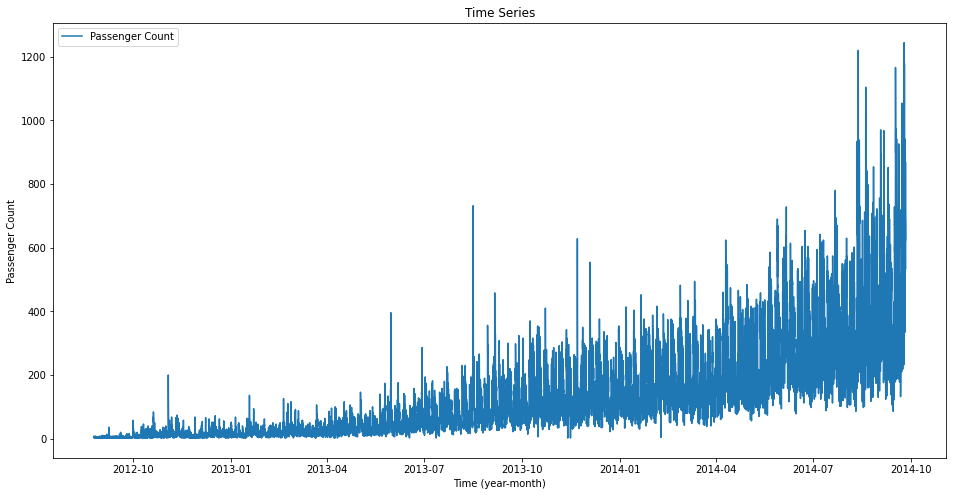

In [15]:
# Lets plot the timeseries
plt.figure(figsize=(16, 8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time (year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')
plt.show()

Here we can see an increasing trend in the series. Also there certain points which have unusally high number of counts. This could be due to high traffic on that day, reason being a festival, strikes, accidents on major roads etc.

# EDA
Lets try and check if our Hypotheses were correct or not:
1. There will be an increase in traffic as the years pass by due to population and expansion of business.

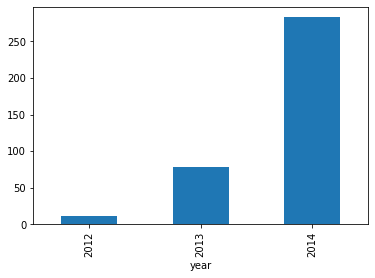

In [16]:
train.groupby('year')['Count'].mean().plot.bar()
plt.show()

Seems like our first assumption is holds. Lets see the second one:
2. Traffic will be high from May to October due to tourism.

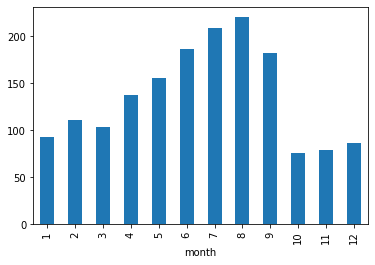

In [17]:
train.groupby('month')['Count'].mean().plot.bar()
plt.show()

Here we see a decrease in last 3 months, something is wrong. Lets look at monthly mean of each year.

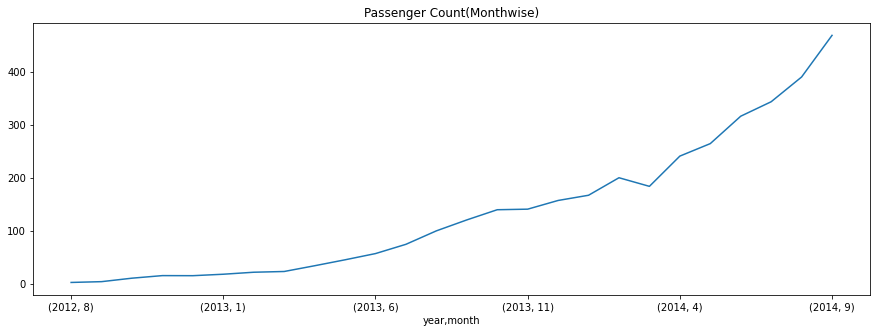

In [18]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15, 5), title='Passenger Count(Monthwise)')
plt.show()

Seems like the data for last 3 months is not there for 2014 which explains the lower mean values for these months in the previous plots.
Lets look at the 3rd hypothesis:
3. Traffic on weekdays will be more.

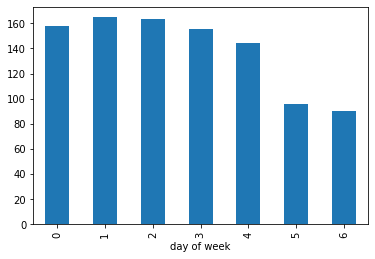

In [19]:
train.groupby('day of week')['Count'].mean().plot.bar()
plt.show()

This assumption holds as well. Now time for the fourth one:
4. Traffic will be high during peak hours.

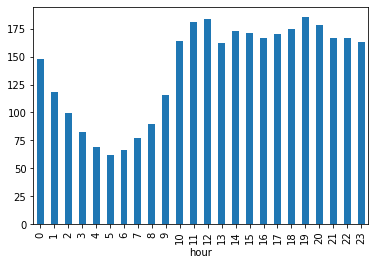

In [20]:
train.groupby('hour')['Count'].mean().plot.bar()
plt.show()

In [21]:
train = train.drop('ID', 1)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18288 entries, 2012-08-25 00:00:00 to 2014-09-25 23:00:00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     18288 non-null  datetime64[ns]
 1   Count        18288 non-null  int64         
 2   year         18288 non-null  int64         
 3   month        18288 non-null  int64         
 4   day          18288 non-null  int64         
 5   hour         18288 non-null  int64         
 6   day of week  18288 non-null  int64         
 7   weekend      18288 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 1.3 MB


In [23]:
train.head()

,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [24]:
# Hourly time series
hourly = train.resample('H').mean()
hourly.head()

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [25]:
# Daily time series
daily = train.resample('D').mean()
daily.head()

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [26]:
# Weekly time series
weekly = train.resample('W').mean()
weekly.head()

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-26,3.416667,2012.0,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,3.345238,2012.0,8.285714,21.142857,11.5,3.0,0.285714
2012-09-09,3.654762,2012.0,9.000000,6.000000,11.5,3.0,0.285714
2012-09-16,3.119048,2012.0,9.000000,13.000000,11.5,3.0,0.285714
2012-09-23,4.714286,2012.0,9.000000,20.000000,11.5,3.0,0.285714


In [27]:
# monthly time series
monthly = train.resample('M').mean()
monthly.head()

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-31,2.952381,2012.0,8.0,28.0,11.5,3.000000,0.285714
2012-09-30,4.444444,2012.0,9.0,15.5,11.5,3.166667,0.333333
2012-10-31,10.986559,2012.0,10.0,16.0,11.5,2.806452,0.258065
2012-11-30,15.827778,2012.0,11.0,15.5,11.5,3.033333,0.266667
2012-12-31,15.680108,2012.0,12.0,16.0,11.5,3.064516,0.322581


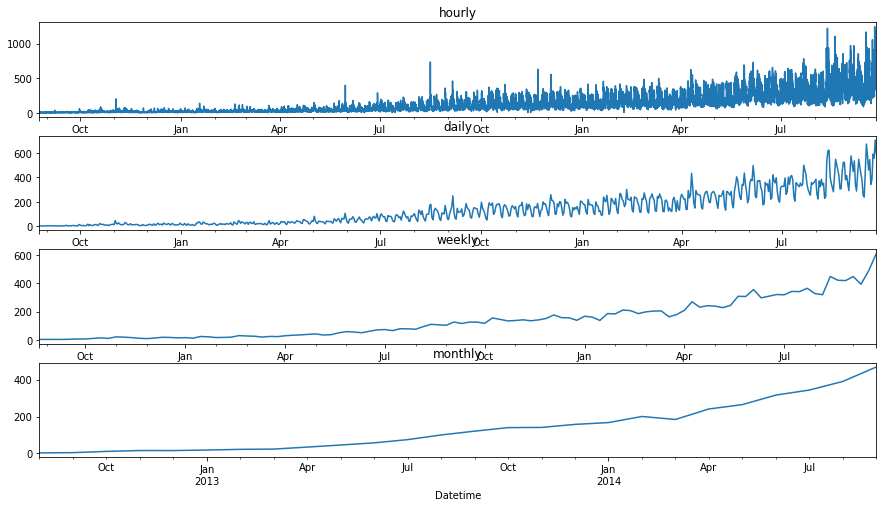

In [28]:
fig, axis = plt.subplots(4, 1)
hourly.Count.plot(figsize=(15, 8), title='hourly', ax=axis[0])
daily.Count.plot(figsize=(15, 8), title='daily', ax=axis[1])
weekly.Count.plot(figsize=(15, 8), title='weekly', ax=axis[2])
monthly.Count.plot(figsize=(15, 8), title='monthly', ax=axis[3])
plt.show()

We can see that the time series is becoming more aand more stable when we are aggregating it on a daily, weekly and monthly basis.

But it would be difficult to convert the monthly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and then daily to hourly predictions, which will become very long process. So we'll work on the daily time series.

In [29]:
test.head()

,ID,Datetime,year,month,day,hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [30]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

In [31]:
test.head()

,ID,Datetime,year,month,day,hour
Datetime,,,,,,
2014-09-26 00:00:00,18288,2014-09-26 00:00:00,2014,9,26,0
2014-09-26 01:00:00,18289,2014-09-26 01:00:00,2014,9,26,1
2014-09-26 02:00:00,18290,2014-09-26 02:00:00,2014,9,26,2
2014-09-26 03:00:00,18291,2014-09-26 03:00:00,2014,9,26,3
2014-09-26 04:00:00,18292,2014-09-26 04:00:00,2014,9,26,4


In [32]:
test = test.resample('D').mean()

In [33]:
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
train = train.resample('D').mean()

## Train validation split

In [35]:
Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

In [36]:
Train.shape, valid.shape

((669, 7), (93, 7))

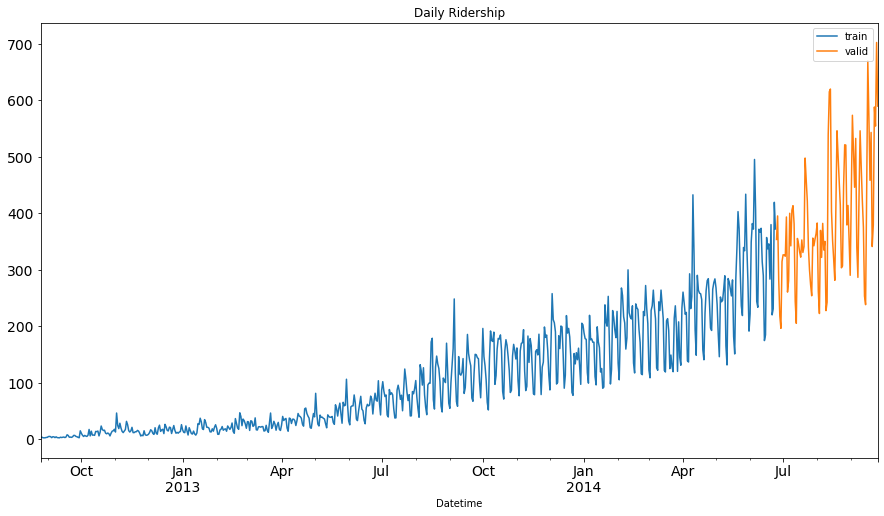

In [37]:
Train.Count.plot(figsize=(15, 8),
    title='Daily Ridership',
    fontsize=14,
    label='train'
)
valid.Count.plot(figsize=(15, 8),
    title='Daily Ridership',
    fontsize=14,
    label='valid'
)
plt.legend(loc='best')
plt.show()

## Modeling Techniques
1. **Naive Approach**: In this forecasting technique, we assume that the nect expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.

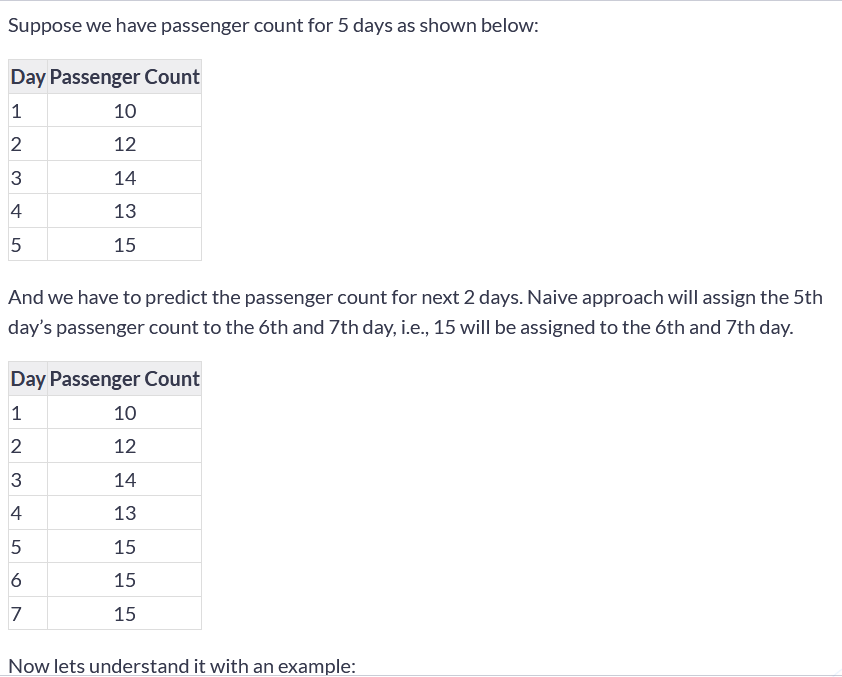

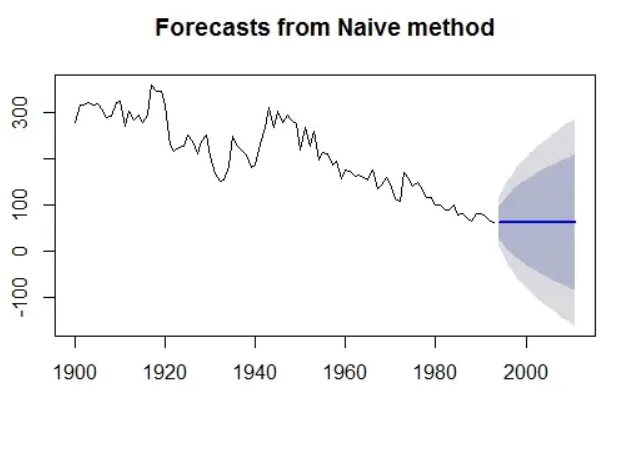

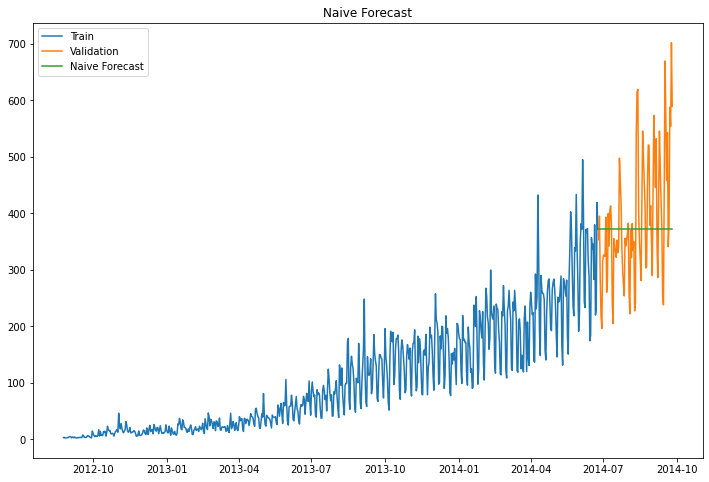

In [38]:
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd) - 1]
plt.figure(figsize=(12, 8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='Validation')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error as mse
rmse = mse(valid.Count, y_hat.naive) ** (1/2)
rmse

111.79050467496724

2. **Moving Average**: In this technique, we will take the average of the passenger counts for last few time periods only.


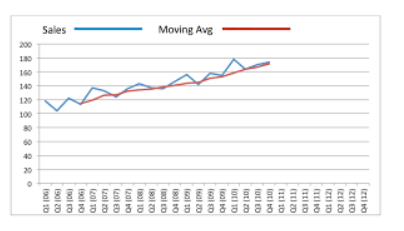

Lets try rolling mean for last 10, 20, 50 days and visualize the results.

In [41]:
def plot_rolling_avg(days):
  y_hat_avg = valid.copy()
  # Avgerage of the n days
  y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(days).mean().iloc[-1]
  plt.figure(figsize=(15, 5))
  plt.plot(Train['Count'], label='Train')
  plt.plot(valid['Count'], label='Valid')
  label = f'Moving Average Forecast using {days} observations'
  plt.plot(y_hat_avg['moving_avg_forecast'], label=label)
  plt.legend(loc='best')
  plt.show()

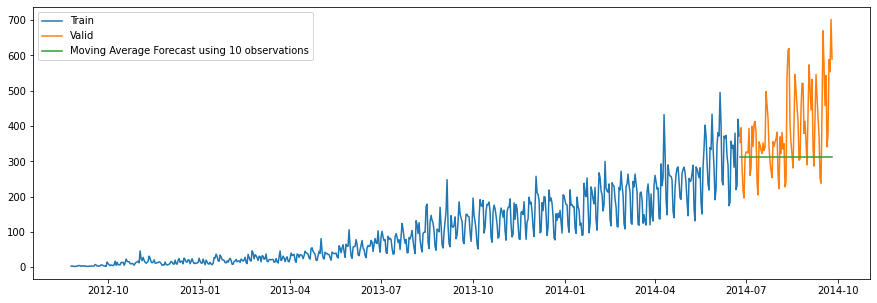

In [42]:
plot_rolling_avg(10)

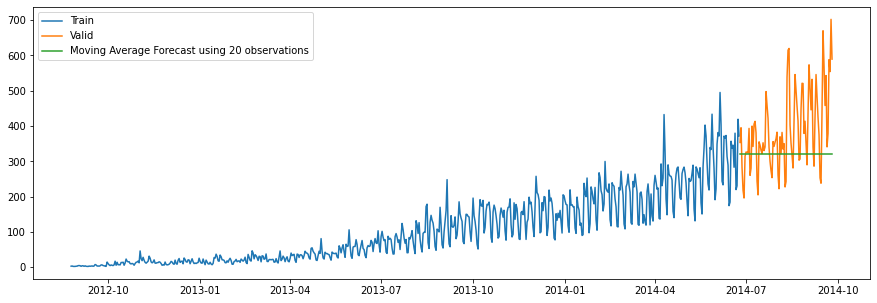

In [43]:
plot_rolling_avg(20)

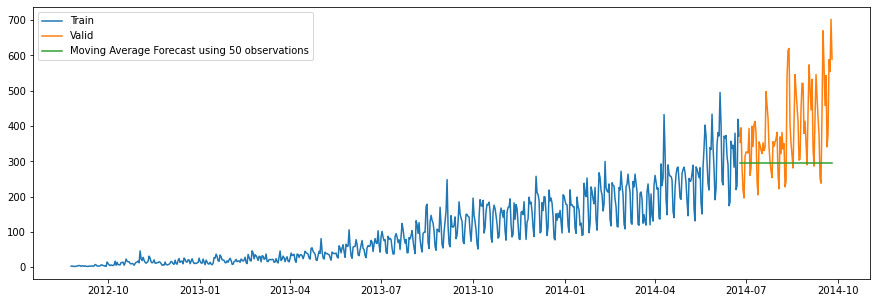

In [45]:
plot_rolling_avg(50)

In [47]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]

In [48]:
rmse = mse(valid.Count, y_hat_avg.moving_avg_forecast) ** (1/2)
rmse

134.23733308950264

3. **Simple Exponential Smoothing**:

 In this technique, we assign larger weights to more recent observations than to observations from the distant past.
 The weights decrease exponentially as observations come further in the past, the smallest weights are associated with the oldest observations.

In [49]:
from statsmodels.tsa.api import (
    ExponentialSmoothing,
    SimpleExpSmoothing,
    Holt    
) 

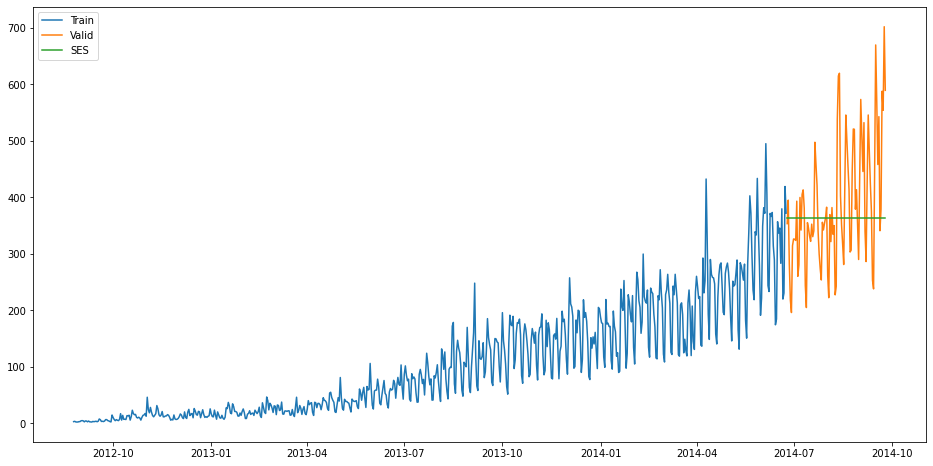

In [51]:
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(
    smoothing_level=0.6, optimized=False
)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16, 8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [52]:
rmse = mse(valid.Count, y_hat_avg.SES) ** (1/2)
rmse

113.43708111884514

4. **Holt's Linear Trend Model**: It is an extension of simple exponential smoothing to allow forecasting of data with a trend. This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

We can decompose the time series in four parts:
* **Observed**, which is the original time series.
* **Trend**, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
* **Seasonal**, which tells us about the seasonality in the time series.
* **Residual**, which is obtained by removing any trend or seasonality in the time series.

In [53]:
import statsmodels.api as sm

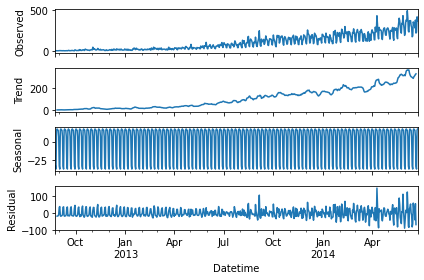

In [54]:
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

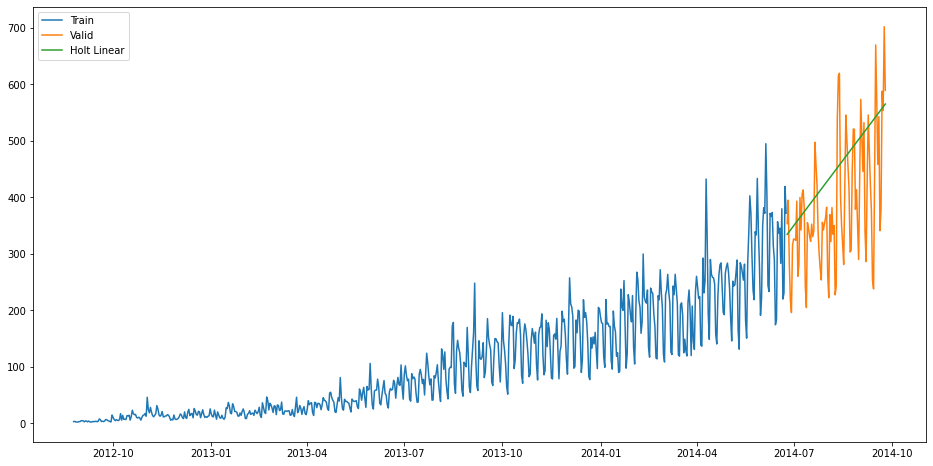

In [55]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(
    smoothing_level=0.3,
    smoothing_slope=0.1
)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16, 8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt Linear')
plt.legend(loc='best')
plt.show()

In [56]:
rmse = mse(valid.Count, y_hat_avg.Holt_linear) ** (1/2)
rmse

112.94278345314041